In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets
from sklearn import semi_supervised
semi_supervised.__all__

['DictionaryLearning',
 'FastICA',
 'IncrementalPCA',
 'KernelPCA',
 'MiniBatchDictionaryLearning',
 'MiniBatchNMF',
 'MiniBatchSparsePCA',
 'NMF',
 'PCA',
 'SparseCoder',
 'SparsePCA',
 'dict_learning',
 'dict_learning_online',
 'fastica',
 'non_negative_factorization',
 'randomized_svd',
 'sparse_encode',
 'FactorAnalysis',
 'TruncatedSVD',
 'LatentDirichletAllocation']

['SelfTrainingClassifier', 'LabelPropagation', 'LabelSpreading']

In [3]:
boston = sklearn.datasets.load_boston()
boston.data

C:\conda\venv\torch\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
 

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
import sklearn.manifold
sklearn.manifold.__all__

['locally_linear_embedding',
 'LocallyLinearEmbedding',
 'Isomap',
 'MDS',
 'smacof',
 'SpectralEmbedding',
 'spectral_embedding',
 'TSNE',
 'trustworthiness']

In [7]:
from sklearn.manifold import TSNE
sne = TSNE()
boston_2 = sne.fit_transform(boston.data)
boston_2_pd = pd.DataFrame(boston_2)
boston_2_pd = (boston_2_pd - boston_2_pd.min()) / (boston_2_pd.max() - boston_2_pd.min())
boston_2 = boston_2_pd.values
boston_2

C:\conda\venv\torch\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\conda\venv\torch\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[0.42685252, 0.33569846],
       [0.3174034 , 0.06132435],
       [0.30798325, 0.07825579],
       ...,
       [0.4748029 , 0.2200603 ],
       [0.4748948 , 0.22194703],
       [0.47088116, 0.23259686]], dtype=float32)

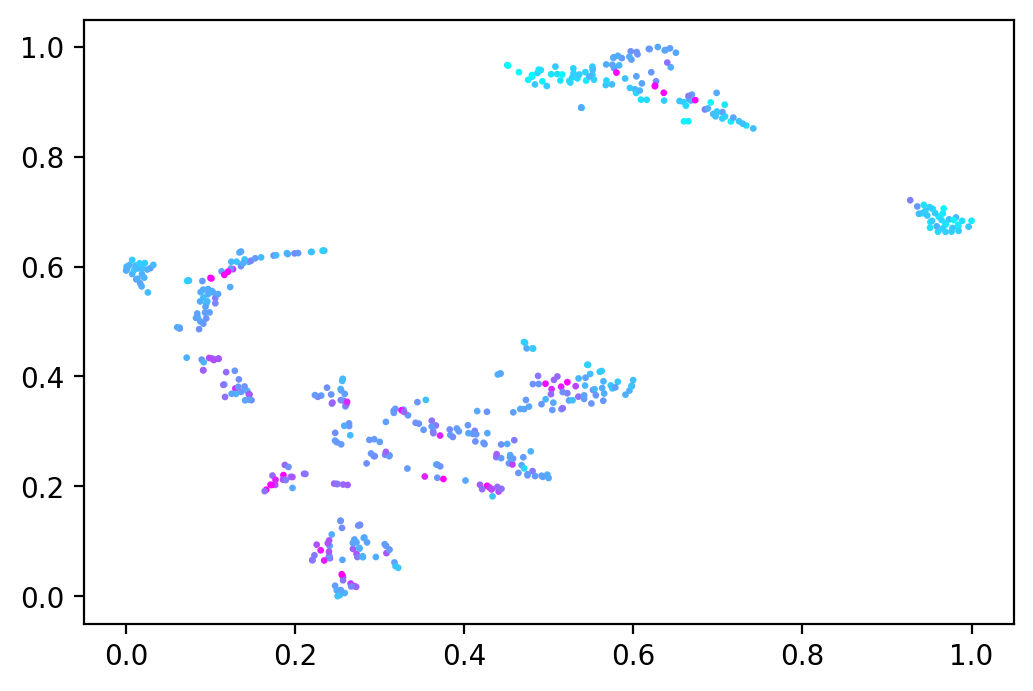

In [10]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(boston_2[:,0], boston_2[:,1], c=boston.target, cmap='cool', s=2)
plt.show()

In [28]:
boston_target = pd.DataFrame(boston.target, columns=['target'])
bm1 = boston_target['target'] > boston_target['target'].median()
bm2 = boston_target['target'] <= boston_target['target'].median()
boston_target['target'][bm1]=1
boston_target['target'][bm2]=0
# boston_target = boston_target['target'].values
# boston_target.dtype=int
boston_target

,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
501,0.0
502,1.0
503,0.0
504,0.0


In [29]:
boston_3 = pd.concat([boston_2_pd, boston_target], axis=1)
boston_3

,0,1,target
0,0.426853,0.335698,0.0
1,0.317403,0.061324,0.0
2,0.307983,0.078256,0.0
3,0.268310,0.085949,0.0
4,0.272571,0.076821,0.0
...,...,...,...
501,0.457696,0.250343,0.0
502,0.467850,0.238438,1.0
503,0.474803,0.220060,0.0
504,0.474895,0.221947,0.0


In [11]:
scale = 100
x = np.linspace(0, 1, scale + 1)
y = np.linspace(0, 1, scale + 1)
x, y = np.meshgrid(x, y)
disp_input = np.vstack((x.flatten(), y.flatten())).T
disp_input

array([[0.  , 0.  ],
       [0.01, 0.  ],
       [0.02, 0.  ],
       ...,
       [0.98, 1.  ],
       [0.99, 1.  ],
       [1.  , 1.  ]])

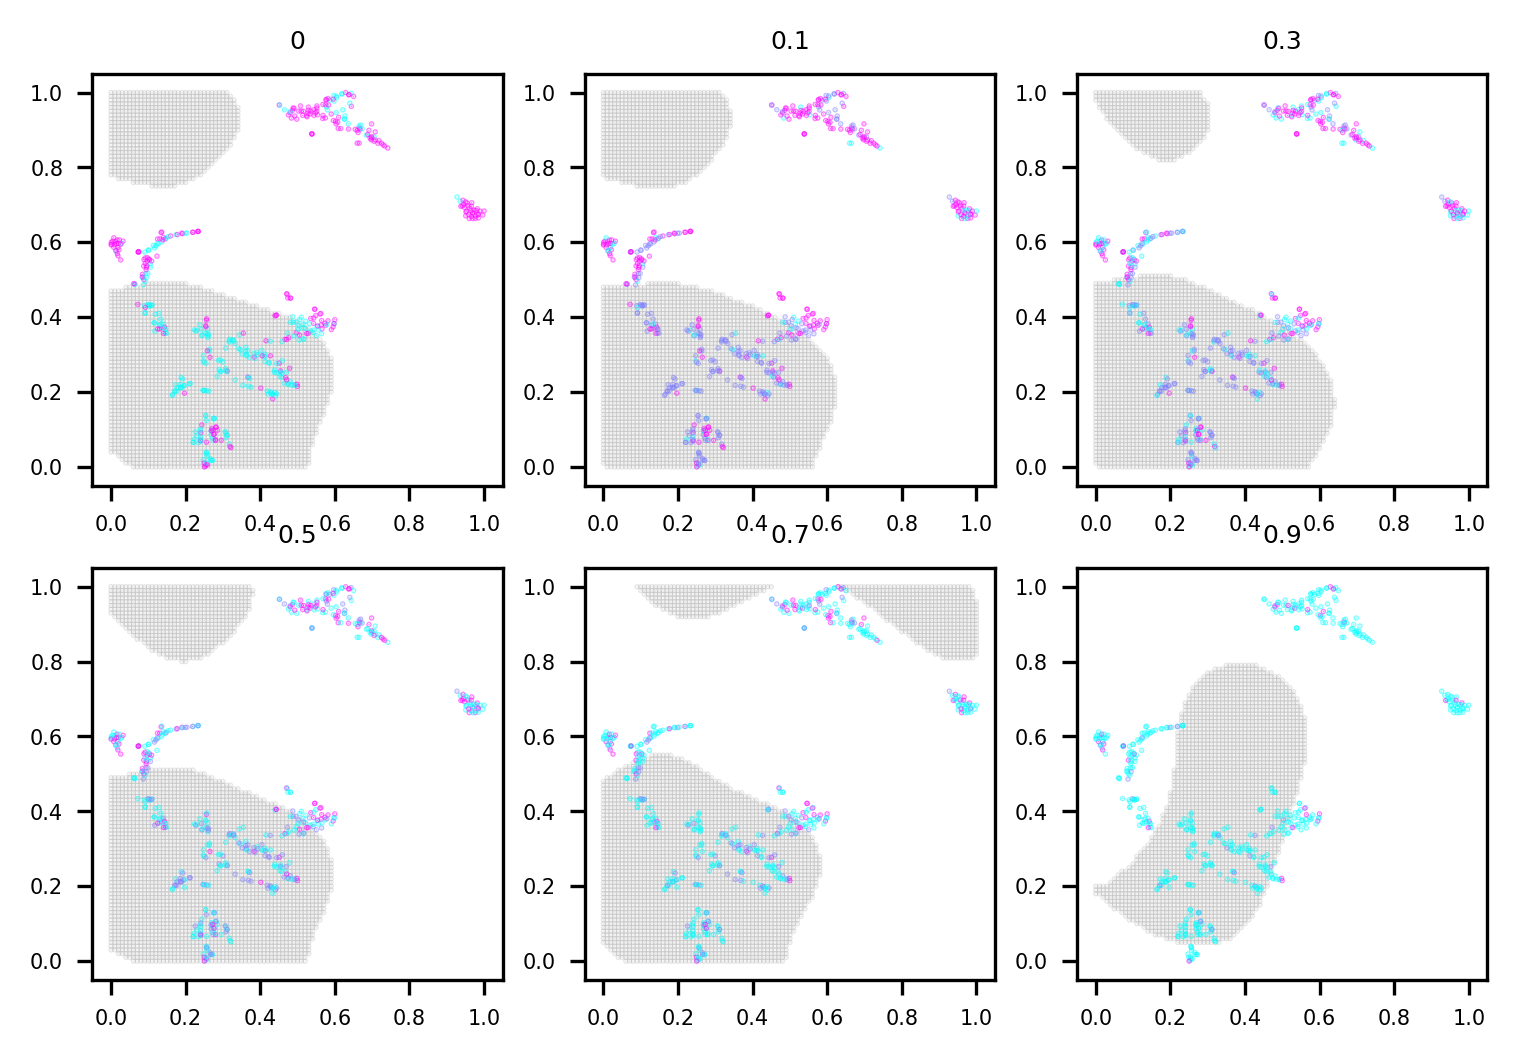

In [35]:
# 原始SVC
from sklearn.svm import SVC
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 5
n = boston_2.shape[0]
for p, i in zip([0, 0.1, 0.3, 0.5, 0.7, 0.9], range(1, 1000)):
    data_2 = boston_3.copy()
    np.random.seed(5)
    data_2.loc[np.random.choice(range(1, n), size=int(n * p), replace=False), 'target'] = -1
    data_3 = data_2[data_2['target'] != -1]
    svc = SVC(C=100)
    svc.fit(data_3[[0,1]].values, data_3['target'].values)
    disp_predict = svc.predict(disp_input)
    plt.subplot(2, 3, i)
    plt.scatter(disp_input[:, 0], disp_input[:, 1], c=disp_predict, cmap='gray', alpha=0.1, s=0.1)
    plt.scatter(data_2[[0]], data_2[[1]], c=data_2['target'], cmap='cool', s=0.1, alpha=0.5)
    plt.title("{}".format(p))
plt.show()

C:\conda\venv\torch\lib\site-packages\sklearn\semi_supervised\_self_training.py:212: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


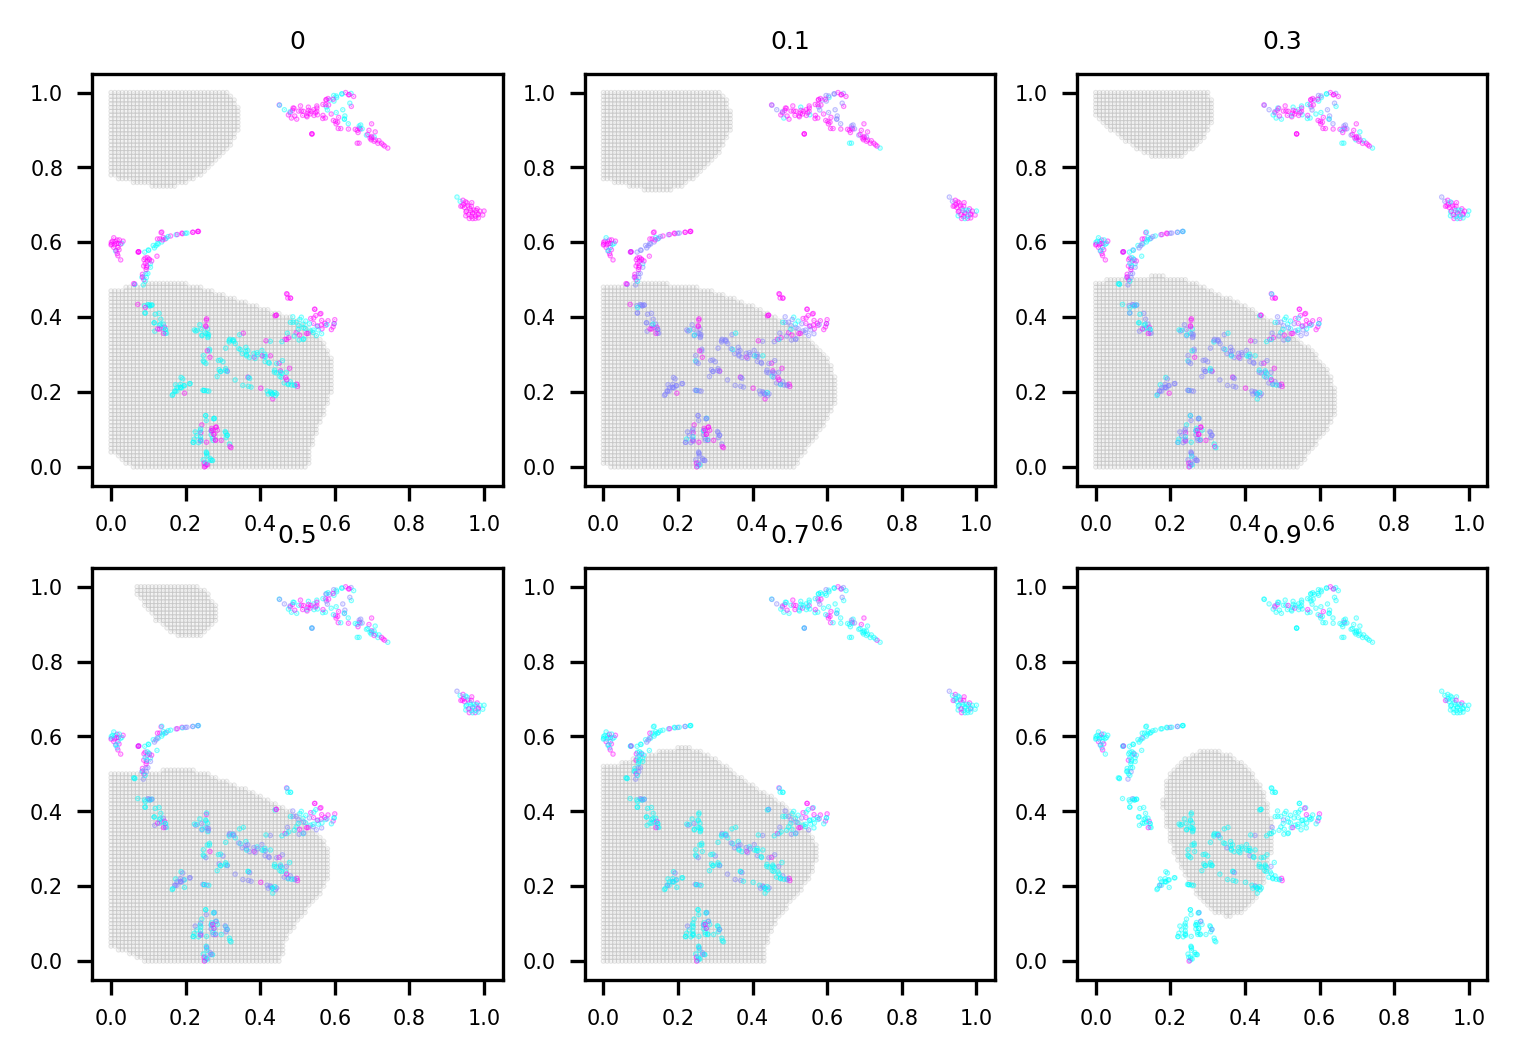

In [41]:
# 半监督SVC
from sklearn.svm import SVC
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 5
n = boston_2.shape[0]
for p, i in zip([0, 0.1, 0.3, 0.5, 0.7, 0.9], range(1, 1000)):
    data_2 = boston_3.copy()
    np.random.seed(5)
    data_2.loc[np.random.choice(range(1, n), size=int(n * p), replace=False), 'target'] = -1
    data_3 = data_2[data_2['target'] != -1]
    svc = SVC(C=100,probability=True)
    svc_semi = semi_supervised.SelfTrainingClassifier(svc)
    svc_semi.fit(data_2[[0,1]].values, data_2['target'].values)
    disp_predict = svc_semi.predict(disp_input)
    plt.subplot(2, 3, i)
    plt.scatter(disp_input[:, 0], disp_input[:, 1], c=disp_predict, cmap='gray', alpha=0.1, s=0.1)
    plt.scatter(data_2[[0]], data_2[[1]], c=data_2['target'], cmap='cool', s=0.1, alpha=0.5)
    plt.title("{}".format(p))
plt.show()

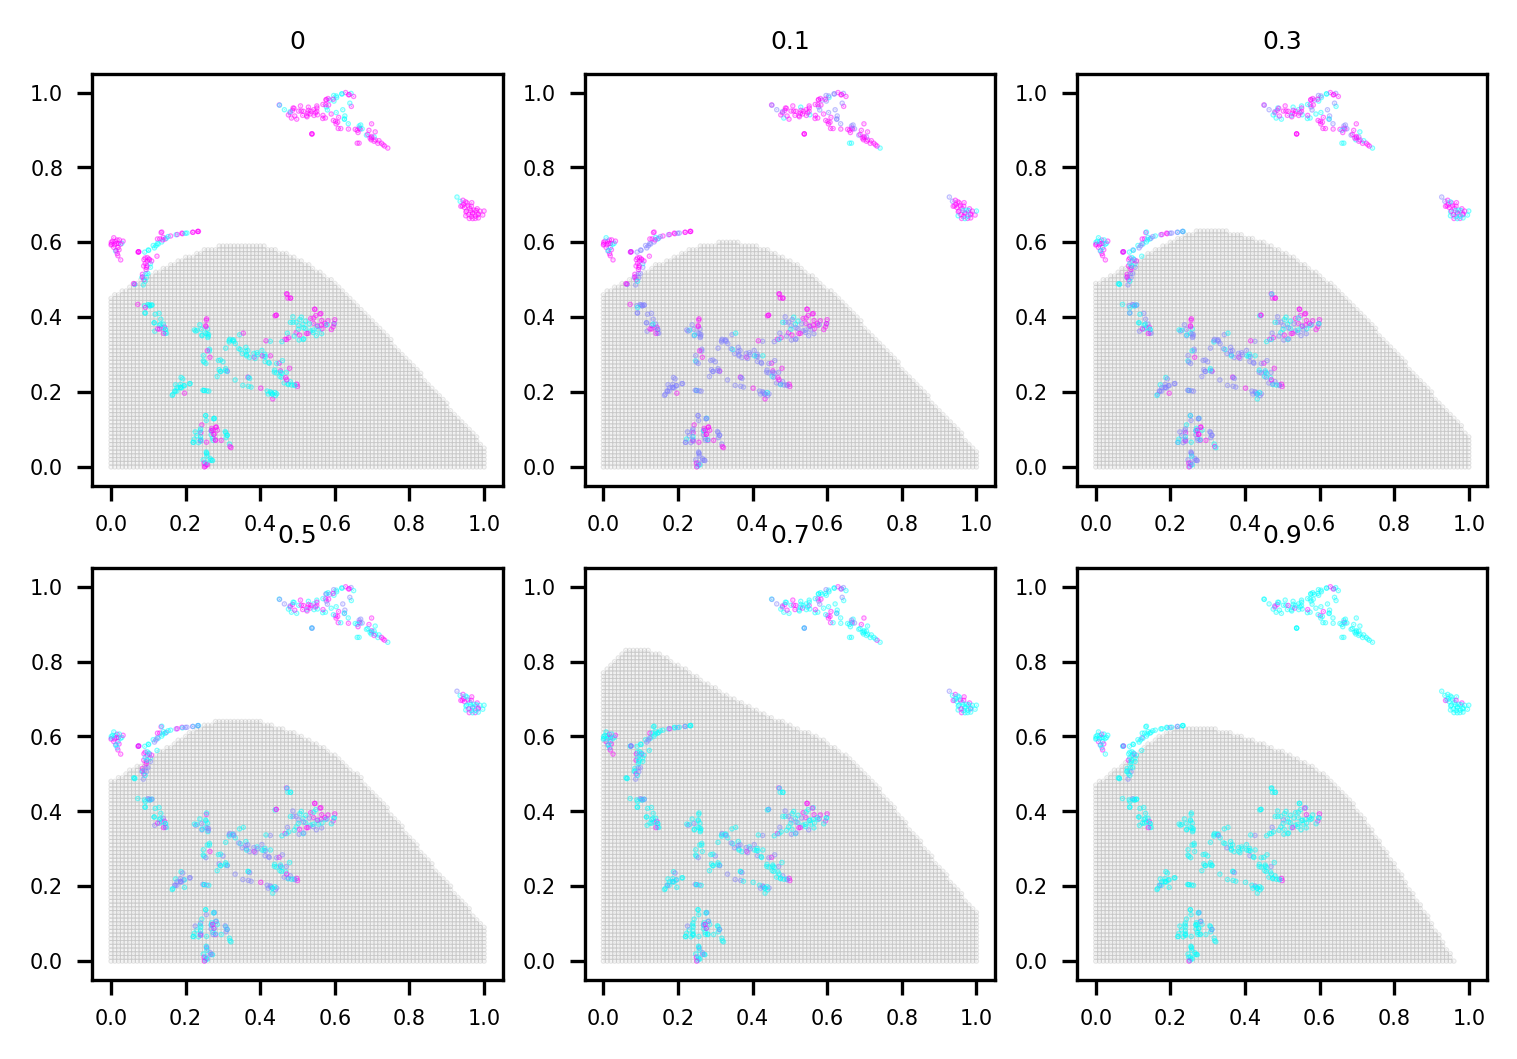

In [42]:
# 半监督SVC
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.svm import SVC
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 5
n = boston_2.shape[0]
for p, i in zip([0, 0.1, 0.3, 0.5, 0.7, 0.9], range(1, 1000)):
    data_2 = boston_3.copy()
    np.random.seed(5)
    data_2.loc[np.random.choice(range(1, n), size=int(n * p), replace=False), 'target'] = -1
    data_3 = data_2[data_2['target'] != -1]

    model = LabelPropagation()
    model.fit(data_2[[0,1]].values, data_2['target'].values)
    disp_predict = model.predict(disp_input)
    plt.subplot(2, 3, i)
    plt.scatter(disp_input[:, 0], disp_input[:, 1], c=disp_predict, cmap='gray', alpha=0.1, s=0.1)
    plt.scatter(data_2[[0]], data_2[[1]], c=data_2['target'], cmap='cool', s=0.1, alpha=0.5)
    plt.title("{}".format(p))
plt.show()

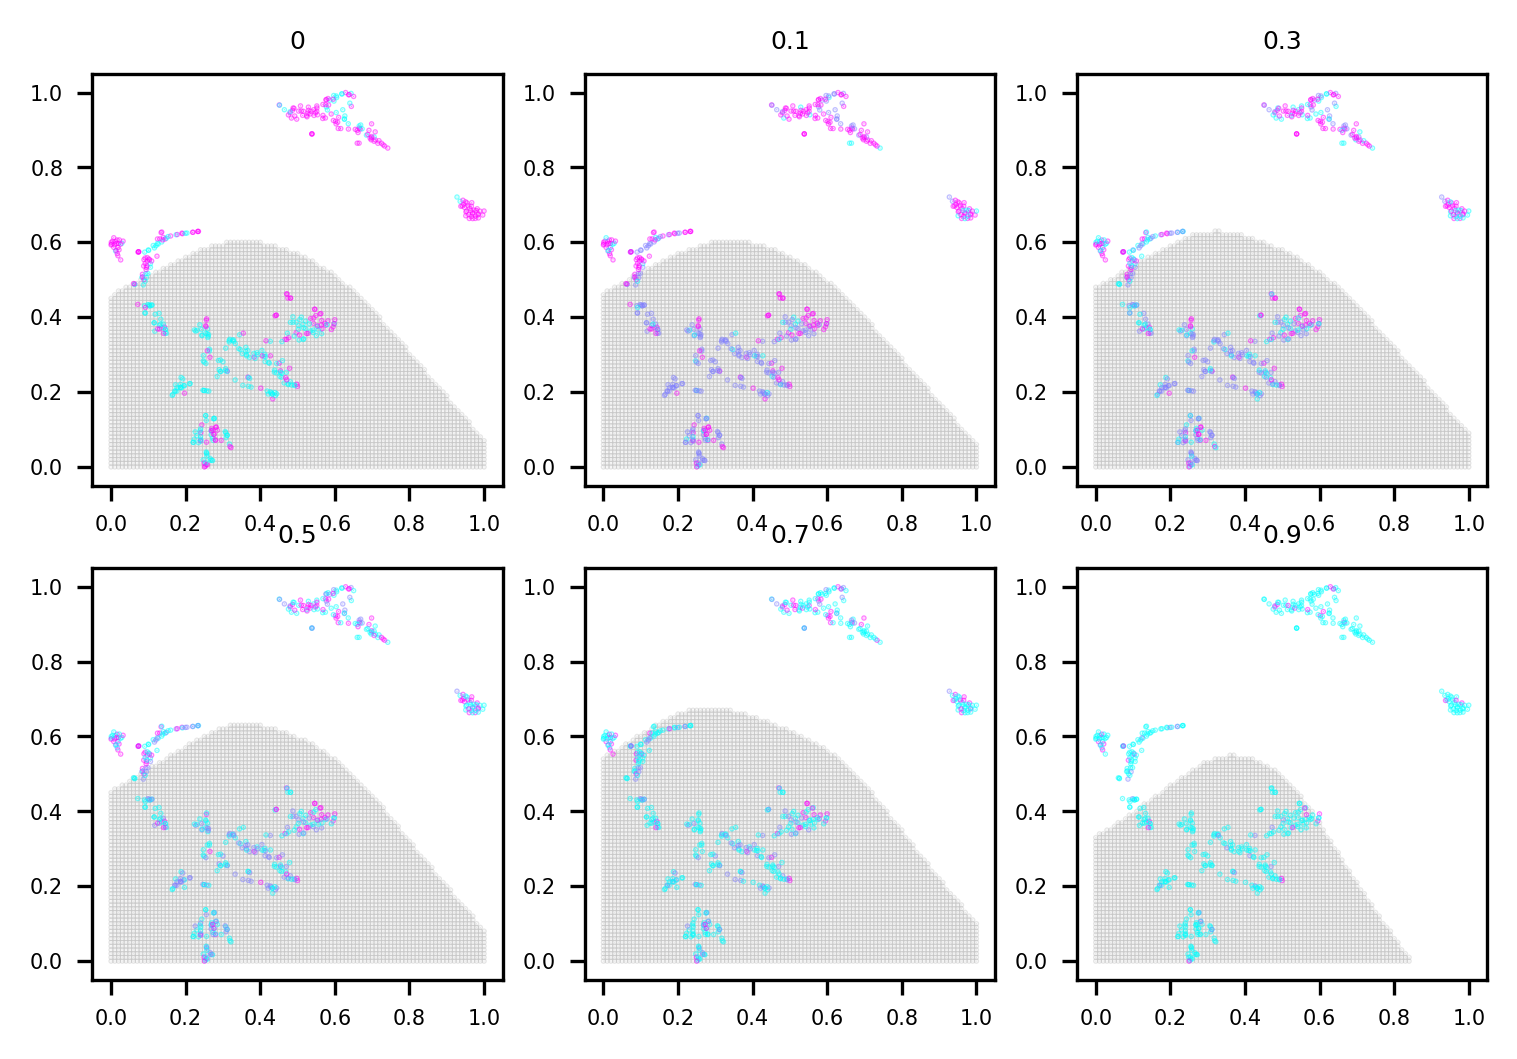

In [43]:
# 半监督SVC
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.svm import SVC
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 5
n = boston_2.shape[0]
for p, i in zip([0, 0.1, 0.3, 0.5, 0.7, 0.9], range(1, 1000)):
    data_2 = boston_3.copy()
    np.random.seed(5)
    data_2.loc[np.random.choice(range(1, n), size=int(n * p), replace=False), 'target'] = -1
    data_3 = data_2[data_2['target'] != -1]

    model = LabelSpreading()
    model.fit(data_2[[0,1]].values, data_2['target'].values)
    disp_predict = model.predict(disp_input)
    plt.subplot(2, 3, i)
    plt.scatter(disp_input[:, 0], disp_input[:, 1], c=disp_predict, cmap='gray', alpha=0.1, s=0.1)
    plt.scatter(data_2[[0]], data_2[[1]], c=data_2['target'], cmap='cool', s=0.1, alpha=0.5)
    plt.title("{}".format(p))
plt.show()

C:\conda\venv\torch\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


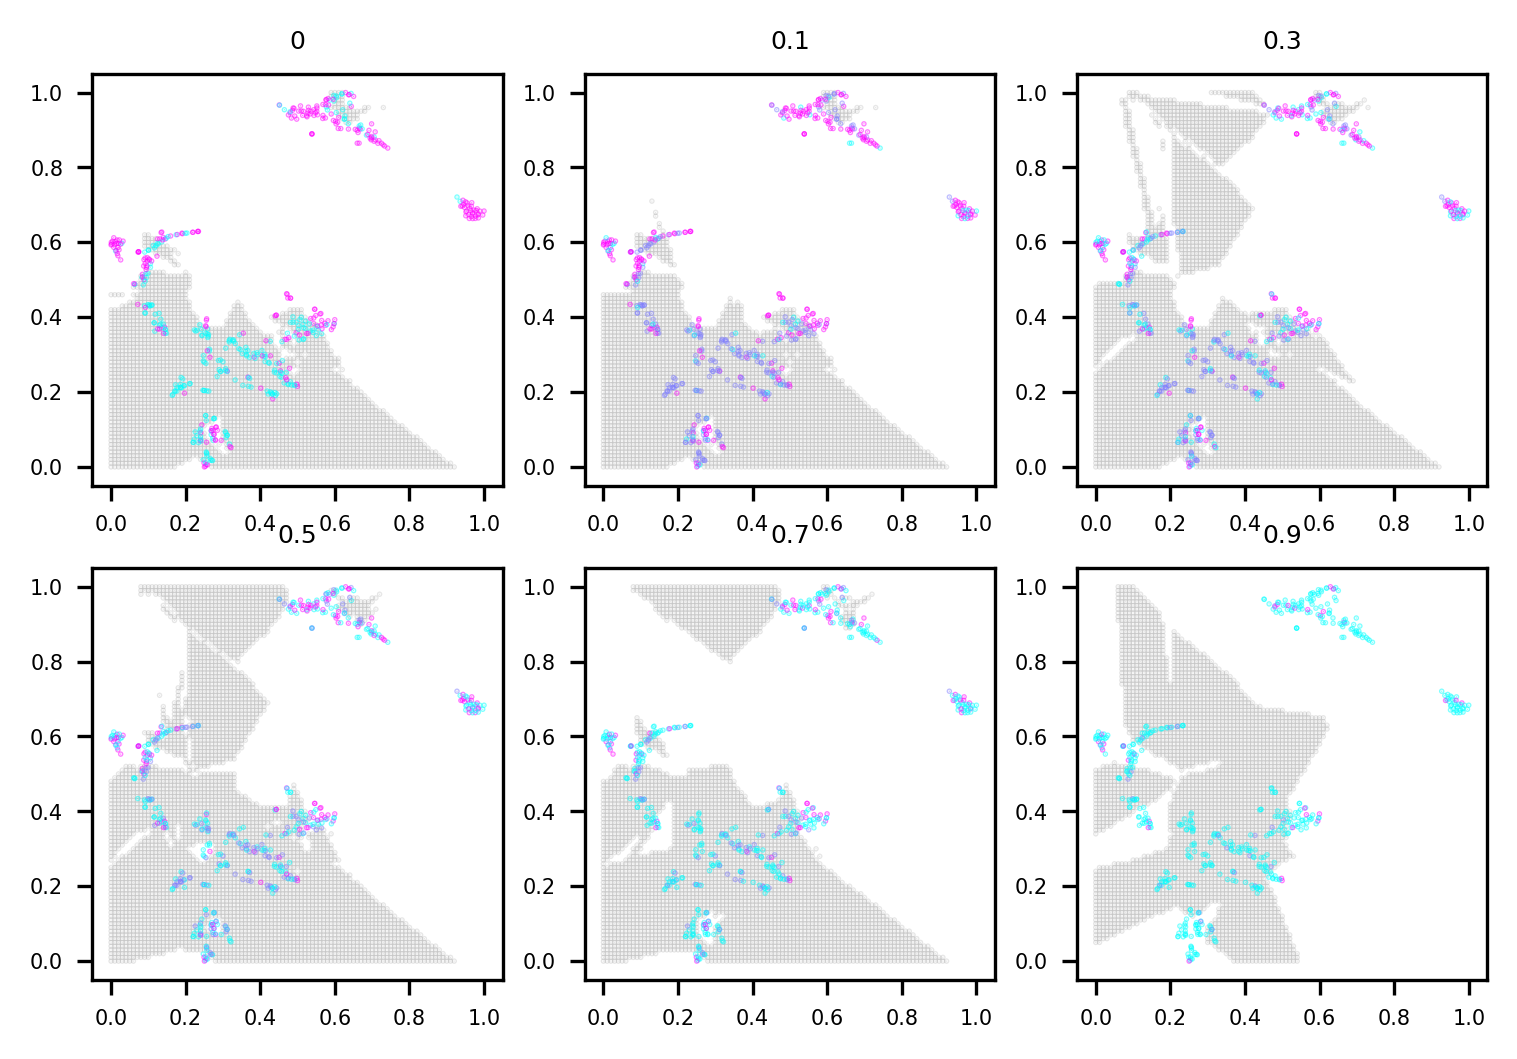

In [44]:
# 半监督SVC
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.svm import SVC
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 5
n = boston_2.shape[0]
for p, i in zip([0, 0.1, 0.3, 0.5, 0.7, 0.9], range(1, 1000)):
    data_2 = boston_3.copy()
    np.random.seed(5)
    data_2.loc[np.random.choice(range(1, n), size=int(n * p), replace=False), 'target'] = -1
    data_3 = data_2[data_2['target'] != -1]

    model = LabelPropagation(kernel='knn')
    model.fit(data_2[[0,1]].values, data_2['target'].values)
    disp_predict = model.predict(disp_input)
    plt.subplot(2, 3, i)
    plt.scatter(disp_input[:, 0], disp_input[:, 1], c=disp_predict, cmap='gray', alpha=0.1, s=0.1)
    plt.scatter(data_2[[0]], data_2[[1]], c=data_2['target'], cmap='cool', s=0.1, alpha=0.5)
    plt.title("{}".format(p))
plt.show()

C:\conda\venv\torch\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


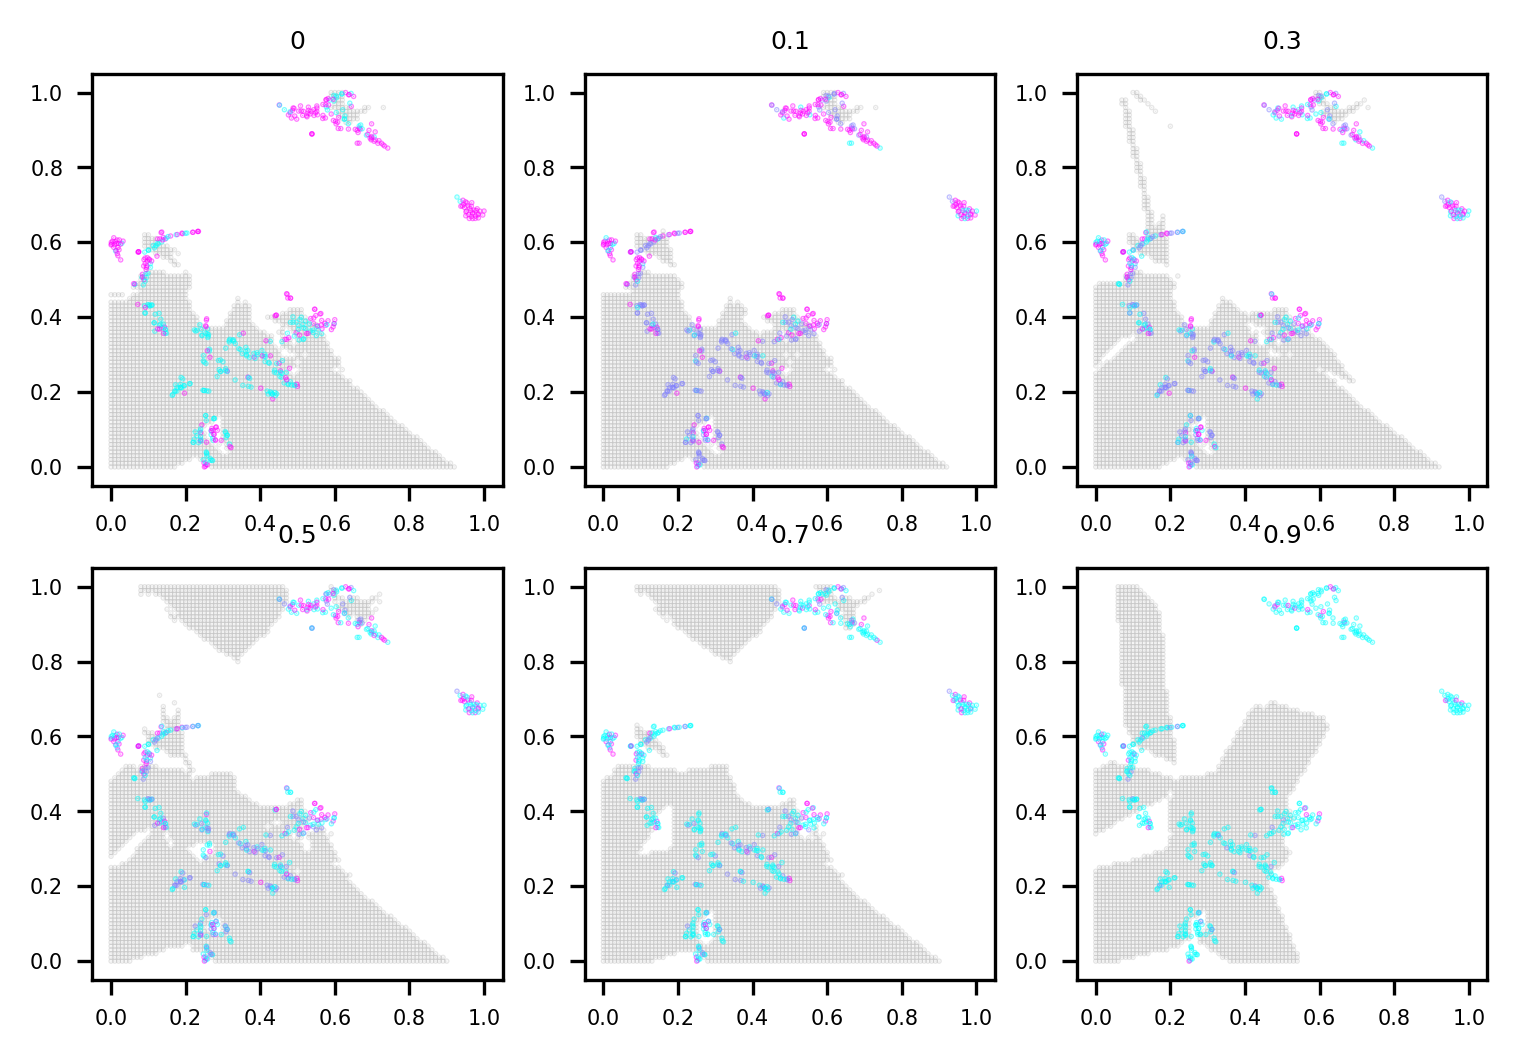

In [45]:
# 半监督SVC
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.svm import SVC
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 5
n = boston_2.shape[0]
for p, i in zip([0, 0.1, 0.3, 0.5, 0.7, 0.9], range(1, 1000)):
    data_2 = boston_3.copy()
    np.random.seed(5)
    data_2.loc[np.random.choice(range(1, n), size=int(n * p), replace=False), 'target'] = -1
    data_3 = data_2[data_2['target'] != -1]

    model = LabelSpreading(kernel='knn')
    model.fit(data_2[[0,1]].values, data_2['target'].values)
    disp_predict = model.predict(disp_input)
    plt.subplot(2, 3, i)
    plt.scatter(disp_input[:, 0], disp_input[:, 1], c=disp_predict, cmap='gray', alpha=0.1, s=0.1)
    plt.scatter(data_2[[0]], data_2[[1]], c=data_2['target'], cmap='cool', s=0.1, alpha=0.5)
    plt.title("{}".format(p))
plt.show()